# Analiza podatkov

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_cleaned.xlsx")
#df = df.drop(df.columns[5], axis=1)# to je zelo slaba koda
df = df.drop('Unnamed: 0', axis=1)

In [2]:
#df = df.apply(pd.to_numeric, errors='coerce')

In [3]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,2,5,3,3,2,0,1,0,17,27,19,17,25,26
1,3,2,3,2,2,0,1,0,20,22,20,31,33,20
2,2,4,2,2,2,0,1,0,27,30,25,25,25,23
3,3,2,2,2,1,0,1,0,20,17,21,25,34,25
4,2,4,2,2,3,0,1,1,21,24,23,23,20,24


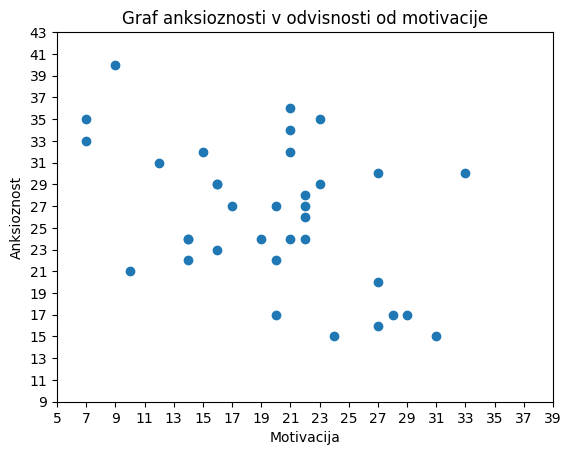

In [4]:
from matplotlib import pyplot
pyplot.scatter(df["Motivacija"], df["Anksioznost"])
pyplot.xlabel('Motivacija')
pyplot.ylabel('Anksioznost')
pyplot.title('Graf anksioznosti v odvisnosti od motivacije')


pyplot.xticks(np.arange(5, 40, 2))

pyplot.yticks(np.arange(9, 45, 2))


pyplot.show()

In [5]:
from numpy import cov
covariance = cov(df["Motivacija"], df["Anksioznost"])
print(covariance)

[[ 42.56302521 -18.69327731]
 [-18.69327731  42.36134454]]


In [6]:
from numpy.random import seed
from scipy.stats import pearsonr
seed(42)

In [7]:
corr, _ = pearsonr(df["Motivacija"], df["Anksioznost"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.440


In [8]:
from scipy.stats import spearmanr
corr, _ = spearmanr(df["Motivacija"], df["Anksioznost"])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.349


Test linearnosti

In [9]:
import statsmodels.formula.api as smf

fit = smf.ols('Motivacija ~ Anksioznost', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:             Motivacija   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     7.933
Date:                Fri, 01 Dec 2023   Prob (F-statistic):            0.00813
Time:                        15:32:20   Log-Likelihood:                -111.03
No. Observations:                  35   AIC:                             226.1
Df Residuals:                      33   BIC:                             229.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      31.2506      4.217      7.410      

In [10]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 0.9386422263095068),
 ('p-value', 0.332627271086349),
 ('f-value', 0.9093939729008526),
 ('f p-value', 0.34720875595229717)]